# Personal Finance Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
# Load Data
df = pd.read_csv(r"E:/Personal_Finance_Advisor/data/indian_personal_finance.csv")
print(df.head())
print(df.info())

          Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport  ...  \
0        0.000000  2206.490129   6658.768341  2636.970696  ...   
1        0.000000   869.522617   2818.444460  1543.018778  ...   
2     4612.103386  2201.800050   6313.222081  3221.396403  ...   
3     6809.441427  4889.418087  14690.149363  7106.130005  ...   
4     3112.609398   635.907170   3034.329665  1276.155163  ...   

   Desired_Savings  Disposable_Income  Potential_Savings_Groceries  \
0      6200.537192       11265.627707                  1685.696222   
1     

In [20]:
# Calculate Key Metrics
expense_cols = ['Rent','Loan_Repayment','Insurance','Groceries','Transport','Eating_Out',
                'Entertainment','Utilities','Healthcare','Education','Miscellaneous']

df['Total_Expense'] = df[expense_cols].sum(axis=1)
df['Actual_Savings'] = df['Income'] - df['Total_Expense']
df['Savings_Achievement_%'] = ((df['Actual_Savings'] / df['Desired_Savings']) * 100).round(2)
df['Recommendation'] = np.where(df['Savings_Achievement_%'] >= 100, 'On Track', 'Need Improvement')

print("\n--- Updated Dataset with Calculated Columns ---\n")
print(df[['Income', 'Total_Expense', 'Actual_Savings', 'Desired_Savings', 'Savings_Achievement_%', 'Recommendation']].head())


--- Updated Dataset with Calculated Columns ---

          Income  Total_Expense  Actual_Savings  Desired_Savings  \
0   44637.249636   33371.621929    11265.627707      6200.537192   
1   26858.596592   17181.777859     9676.818733      1923.176434   
2   50367.605084   36476.154459    13891.450624      7050.360422   
3  101455.600247   69837.646632    31617.953615     16694.965136   
4   24875.283548   18609.583016     6265.700532      1874.099434   

   Savings_Achievement_% Recommendation  
0                 181.69       On Track  
1                 503.17       On Track  
2                 197.03       On Track  
3                 189.39       On Track  
4                 334.33       On Track  


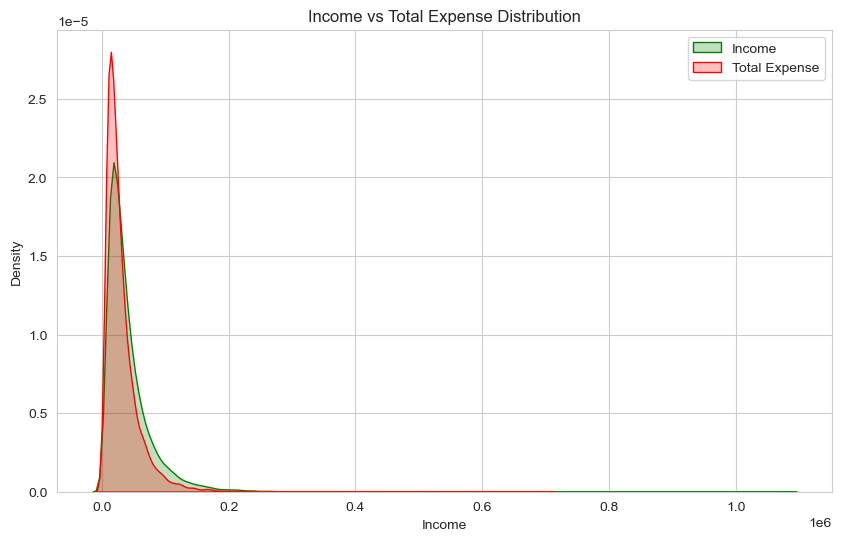

<Figure size 1000x600 with 0 Axes>

In [5]:
# Visualizations
# Income vs Total Expense
sns.kdeplot(df['Income'], label='Income', fill=True, color='green')
sns.kdeplot(df['Total_Expense'], label='Total Expense', fill=True, color='red')
plt.title("Income vs Total Expense Distribution")
plt.legend()
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/Income_vs_Expense.png", bbox_inches='tight')
plt.show()
plt.clf()

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_22572\476110152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y='Savings_Achievement_%', data=df, estimator=np.mean, palette='viridis')


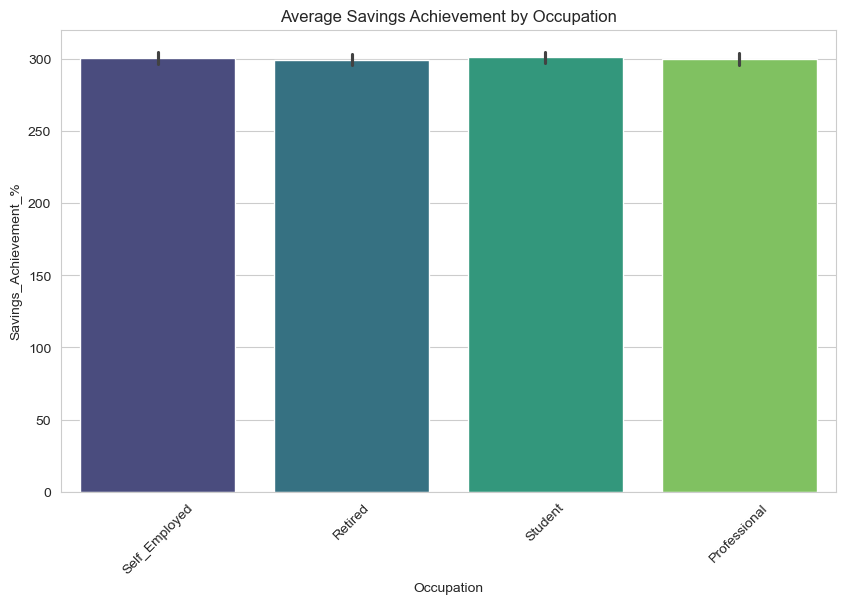

<Figure size 1000x600 with 0 Axes>

In [6]:
# Savings Achievement by Occupation
sns.barplot(x='Occupation', y='Savings_Achievement_%', data=df, estimator=np.mean, palette='viridis')
plt.title("Average Savings Achievement by Occupation")
plt.xticks(rotation=45)
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/Savings_By_Occupation.png", bbox_inches='tight')
plt.show()
plt.clf()

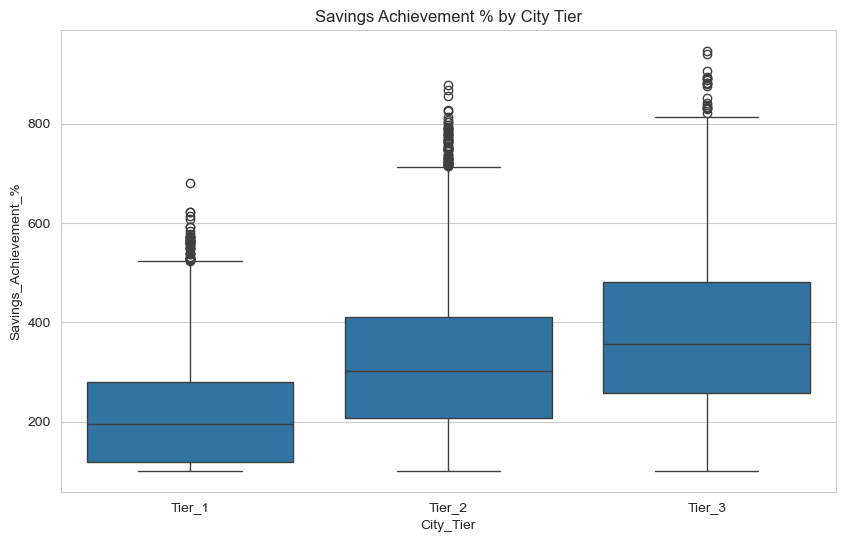

<Figure size 1000x600 with 0 Axes>

In [7]:
# City-wise Savings Performance
sns.boxplot(x='City_Tier', y='Savings_Achievement_%', data=df)
plt.title("Savings Achievement % by City Tier")
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/Savings_By_City.png", bbox_inches='tight')
plt.show()
plt.clf()

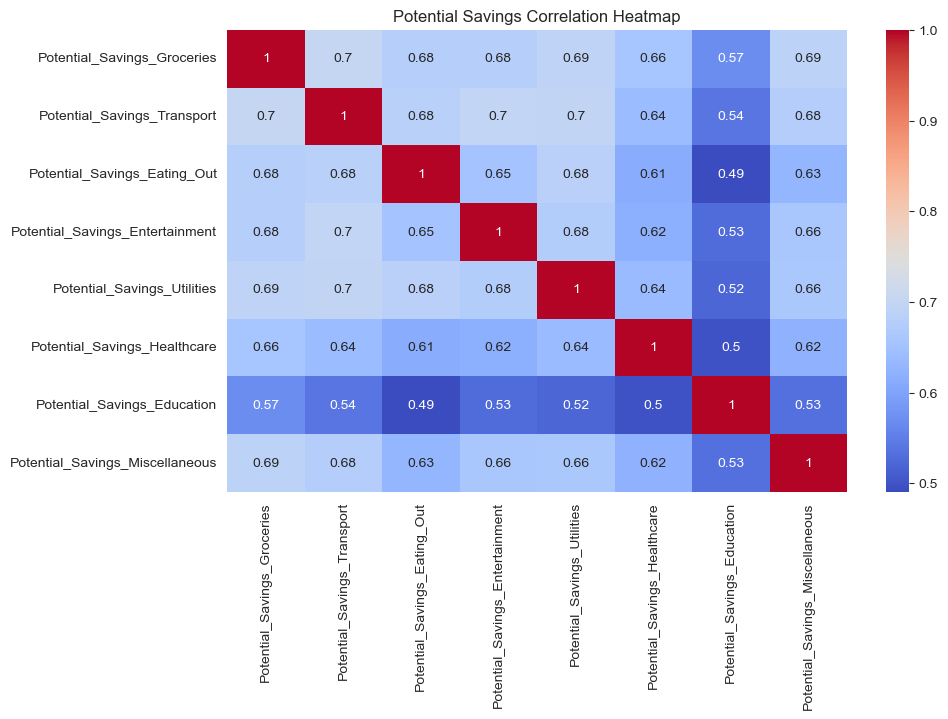

<Figure size 1000x600 with 0 Axes>

In [8]:
# Potential Savings Correlation Heatmap
potential_cols = [col for col in df.columns if 'Potential_Savings' in col]
sns.heatmap(df[potential_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Potential Savings Correlation Heatmap")
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/Potential_Savings_Heatmap.png", bbox_inches='tight')
plt.show()
plt.clf()

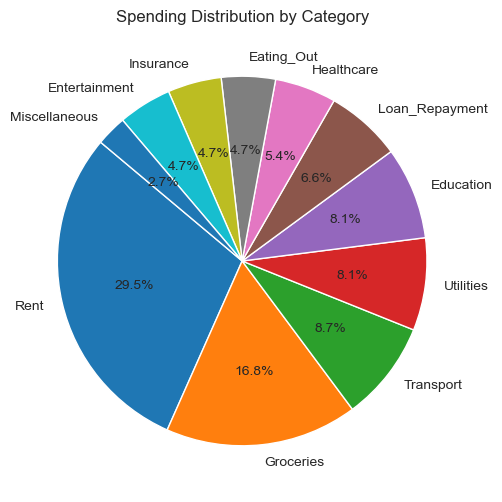

<Figure size 1000x600 with 0 Axes>

In [9]:
# Spending Distribution Pie Chart
df[expense_cols].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Spending Distribution by Category")
plt.ylabel("")
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/Spending_Distribution.png", bbox_inches='tight')
plt.show()
plt.clf()

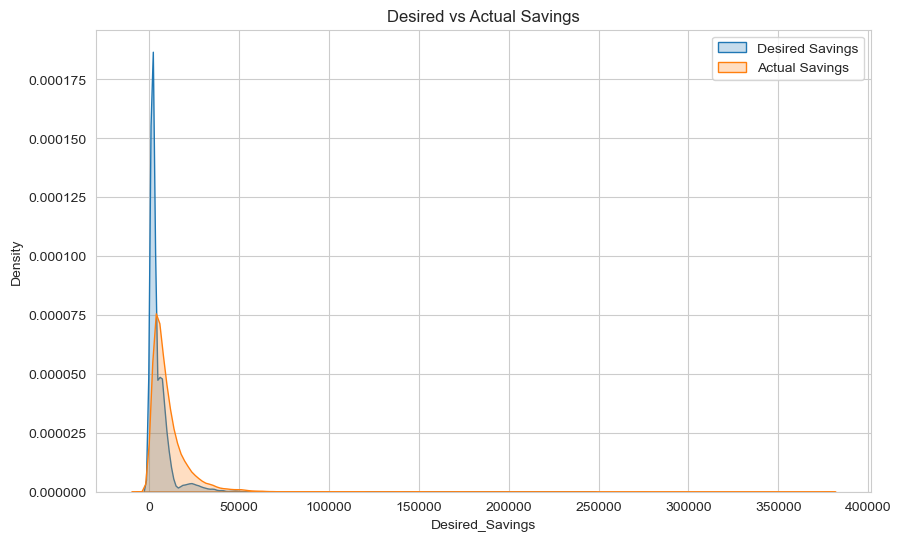

<Figure size 1000x600 with 0 Axes>

In [10]:
# Desired vs Actual Savings Distribution
sns.kdeplot(df['Desired_Savings'], label='Desired Savings', fill=True)
sns.kdeplot(df['Actual_Savings'], label='Actual Savings', fill=True)
plt.title("Desired vs Actual Savings")
plt.legend()
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/Desired_vs_Actual_Savings.png", bbox_inches='tight')
plt.show()
plt.clf()

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_22572\1884562236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommendation', data=df, palette='Set2')


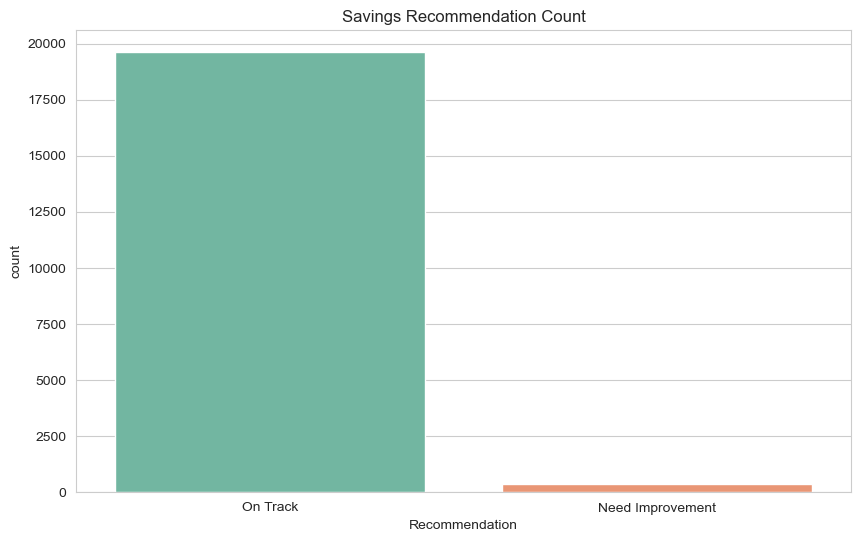

<Figure size 1000x600 with 0 Axes>

In [11]:
# Savings Status Count
sns.countplot(x='Recommendation', data=df, palette='Set2')
plt.title("Savings Recommendation Count")
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/Savings_Recommendation_Count.png", bbox_inches='tight')
plt.show()
plt.clf()

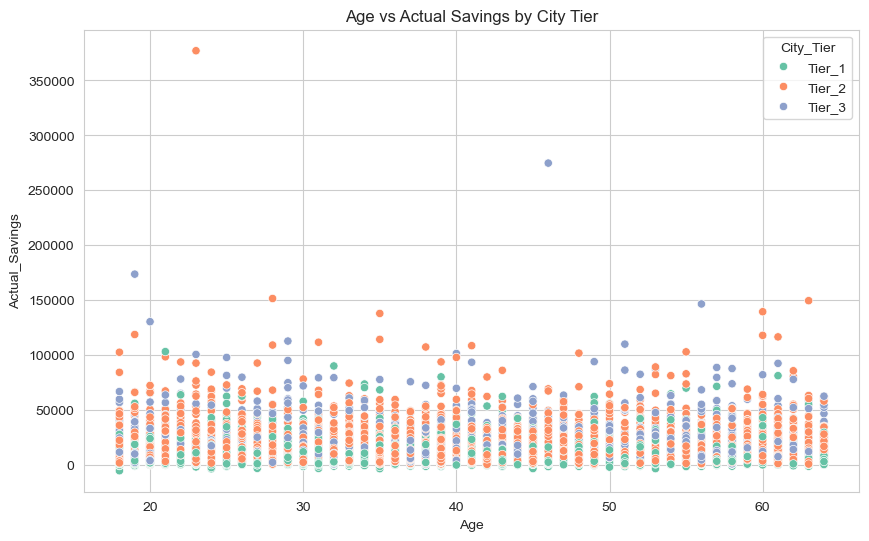

<Figure size 1000x600 with 0 Axes>

In [12]:
# Age vs Actual Savings Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Actual_Savings', hue='City_Tier', data=df, palette='Set2')
plt.title("Age vs Actual Savings by City Tier")
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/Age_vs_Actual_Savings.png", bbox_inches='tight')
plt.show()
plt.clf()

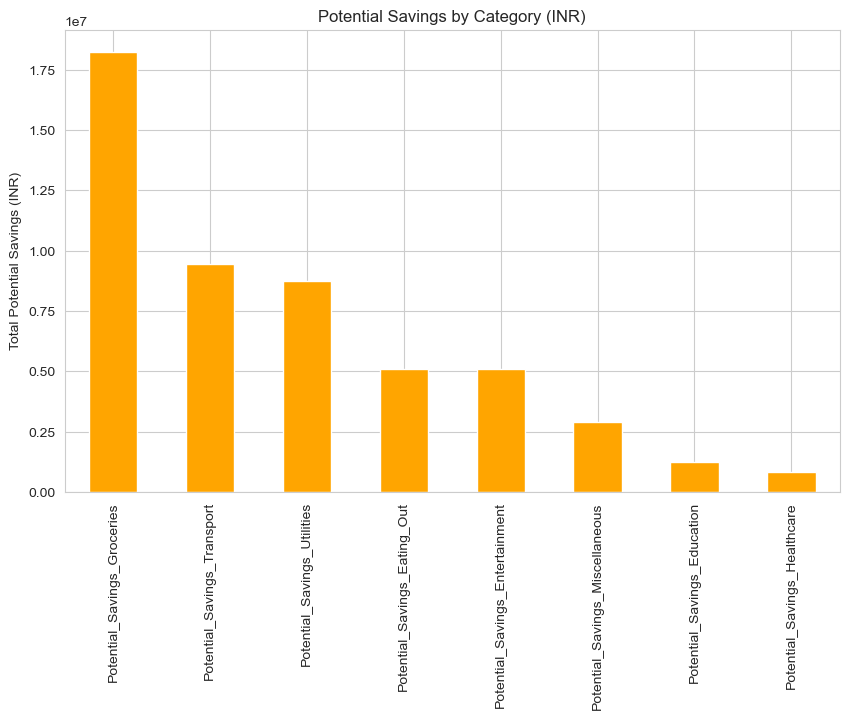

<Figure size 1000x600 with 0 Axes>

In [15]:
# Category-wise Potential Savings Distribution
potential_cols = [col for col in df.columns if 'Potential_Savings' in col]
df[potential_cols].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Potential Savings by Category (INR)")
plt.ylabel("Total Potential Savings (INR)")
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/Potential_Savings_By_Category.png", bbox_inches='tight')
plt.show()
plt.clf()

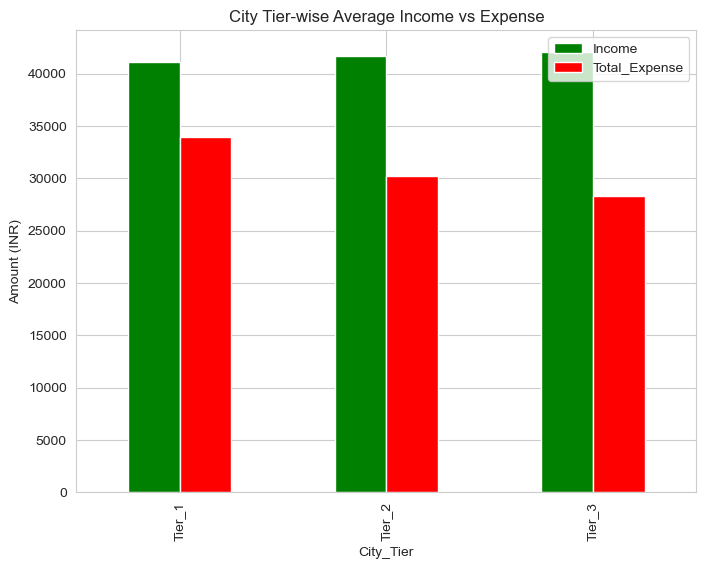

<Figure size 1000x600 with 0 Axes>

In [14]:
# City Tier-wise Average Income vs Average
city_avg = df.groupby('City_Tier')[['Income', 'Total_Expense']].mean().reset_index()
city_avg.plot(x='City_Tier', kind='bar', figsize=(8,6), color=['green', 'red'])
plt.title("City Tier-wise Average Income vs Expense")
plt.ylabel("Amount (INR)")
plt.savefig(r"E:/Personal_Finance_Advisor/output/graphs/City_Avg_Income_Expense.png", bbox_inches='tight')
plt.show()
plt.clf()